In [1]:
import numpy as np
table = np.array([[1613,  22],
                  [  81,  77]])

In [2]:
y_true = [1,1,0,0,2,1,0,2,2]
y_pred = [1,1,0,1,1,0,0,2,1]

In [3]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true, y_pred)

array([[2, 1, 0],
       [1, 2, 0],
       [0, 2, 1]], dtype=int64)

In [4]:
import pandas as pd
df = pd.DataFrame({"y_true":y_true, "y_pred":y_pred})
pd.crosstab(df.y_true, df.y_pred, margins=True)

y_pred,0,1,2,All
y_true,,,,
0,2,1,0,3
1,1,2,0,3
2,0,2,1,3
All,3,5,1,9


In [5]:
def fmeasure(table):
    precision = table[1,1]/(table[0,1]+table[1,1])
    recall = table[1,1]/(table[1,0]+table[1,1])
    return (2*precision*recall/(precision+recall))

In [7]:
import numpy as np
table = np.array([[1613, 22],
                  [  81, 77]])
fmeasure(table)

0.5992217898832685

In [8]:
import pandas as pd
result = pd.read_csv("http://javaspecialist.co.kr/pds/382")
result.head()

,CUST_ID,y_true,y_pred
0,37,0,0
1,51,0,0
2,60,0,0
3,65,0,0
4,73,0,0


In [9]:
import pandas as pd
pd.crosstab(result.y_true, result.y_pred)

y_pred,0,1
y_true,,
0,1613,22
1,81,77


In [10]:
from sklearn.metrics import accuracy_score
accuracy_score(result.y_true, result.y_pred)

0.9425543781372002

In [11]:
from sklearn.metrics import precision_score
precision_score(result.y_true, result.y_pred)

0.7777777777777778

In [12]:
from sklearn.metrics import recall_score
recall_score(result.y_true, result.y_pred)

0.4873417721518987

In [13]:
recall_score(result.y_true, result.y_pred, pos_label=0)

0.9865443425076452

In [14]:
specificity = recall_score(result.y_true, result.y_pred, pos_label=0)
fallout = 1-specificity
fallout

0.013455657492354778

In [15]:
from sklearn.metrics import f1_score
f1_score(result.y_true, result.y_pred)

0.5992217898832685

In [17]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=0)

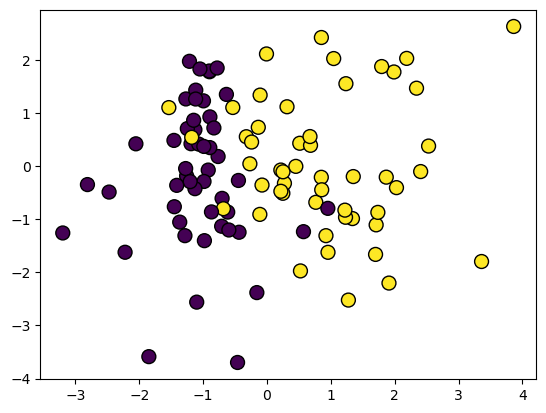

In [18]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], marker='o', c=y, s=100, edgecolor='k')
plt.show()

In [19]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=0)
model.fit(X,y)

LogisticRegression(random_state=0)

In [20]:
y_pred = model.predict(X)
f_value = model.decision_function(X)

In [22]:
import numpy as np
import pandas as pd
df = pd.DataFrame(np.c_[f_value, y_pred, y], columns=["f_value", "y_pred", "y_true"])
df.sort_values("f_value", ascending=False, inplace=True)
df.reset_index(drop=True, inplace=True)
df

,f_value,y_pred,y_true
0,11.454496,1.0,1.0
1,8.170554,1.0,1.0
2,7.143225,1.0,1.0
3,7.111102,1.0,1.0
4,7.018470,1.0,1.0
...,...,...,...
95,-5.587140,0.0,0.0
96,-5.607419,0.0,0.0
97,-5.707310,0.0,0.0
98,-6.484490,0.0,0.0


In [23]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y, y_pred)

array([[48,  2],
       [ 5, 45]], dtype=int64)

In [24]:
from sklearn.metrics import recall_score
recall_score(y,y_pred)

0.9

In [25]:
from sklearn.metrics import recall_score
specificity = recall_score(y,y_pred, pos_label=0)
fallout = 1-specificity
fallout

0.040000000000000036

In [26]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y, model.decision_function(X))
fpr, tpr, thresholds

(array([0.  , 0.  , 0.  , 0.02, 0.02, 0.04, 0.04, 0.36, 0.36, 0.6 , 0.6 ,
        0.76, 0.76, 1.  ]),
 array([0.  , 0.02, 0.46, 0.46, 0.66, 0.66, 0.94, 0.94, 0.96, 0.96, 0.98,
        0.98, 1.  , 1.  ]),
 array([12.45449559, 11.45449559,  2.6601419 ,  2.65484312,  1.60696234,
         1.50599055, -0.16668978, -1.40700746, -1.408684  , -1.92632464,
        -2.02228104, -2.55383198, -2.65345426, -7.86293217]))

In [27]:
fpr, tpr, thresholds = roc_curve(y, model.predict_proba(X)[:,1])
fpr, tpr, thresholds

(array([0.  , 0.  , 0.  , 0.02, 0.02, 0.04, 0.04, 0.36, 0.36, 0.6 , 0.6 ,
        0.76, 0.76, 1.  ]),
 array([0.  , 0.02, 0.46, 0.46, 0.66, 0.66, 0.94, 0.94, 0.96, 0.96, 0.98,
        0.98, 1.  , 1.  ]),
 array([1.99998940e+00, 9.99989398e-01, 9.34633336e-01, 9.34308867e-01,
        8.32989220e-01, 8.18466246e-01, 4.58423779e-01, 1.96706488e-01,
        1.96441708e-01, 1.27157945e-01, 1.16883333e-01, 7.21694707e-02,
        6.57764272e-02, 3.84596109e-04]))

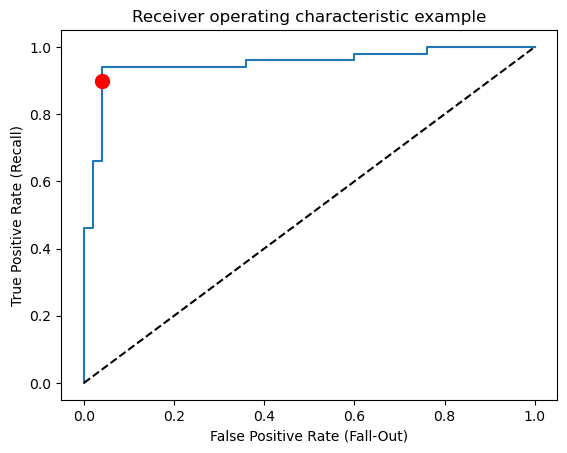

In [28]:
import matplotlib.pyplot as plt
recall = recall_score(y, y_pred)
fallout = 1 - recall_score(y,y_pred, pos_label=0)
plt.plot(fpr, tpr, label="Logistic Regression")
plt.plot([0,1],[0,1],'k--', label="random guess")
plt.plot([fallout], [recall], 'ro', ms=10)
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver operating characteristic example')
plt.show()

In [30]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, weights=[0.95, 0.05], random_state=5)

In [31]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression().fit(X,y)

In [32]:
pred1 = model1.predict(X)

In [33]:
from sklearn.svm import SVC
model2 = SVC(gamma=0.0001, C=3000, probability=True).fit(X,y)
pred2 = model2.predict(X)

In [34]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y,pred1))

[[940   3]
 [ 30  27]]


In [35]:
print(confusion_matrix(y,pred2))

[[940   3]
 [ 30  27]]


In [36]:
from sklearn.metrics import classification_report
print(classification_report(y, pred1))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       943
           1       0.90      0.47      0.62        57

    accuracy                           0.97      1000
   macro avg       0.93      0.74      0.80      1000
weighted avg       0.97      0.97      0.96      1000



In [37]:
print(classification_report(y, pred2))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       943
           1       0.90      0.47      0.62        57

    accuracy                           0.97      1000
   macro avg       0.93      0.74      0.80      1000
weighted avg       0.97      0.97      0.96      1000



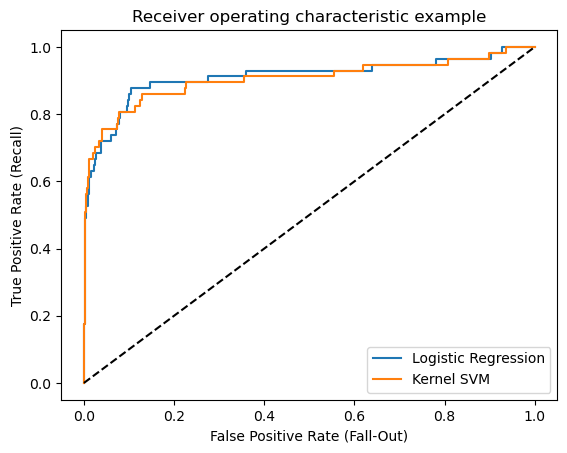

In [38]:
from sklearn.metrics import roc_curve
fpr1, tpr1, thresholds1 = roc_curve(y, model1.decision_function(X))
fpr2, tpr2, thresholds1 = roc_curve(y, model2.decision_function(X))
plt.plot(fpr1, tpr1, label="Logistic Regression")
plt.plot(fpr2, tpr2, label="Kernel SVM")
plt.legend()
plt.plot([0,1], [0,1], 'k--', label="random guess")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver operating characteristic example')
plt.show()

In [39]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, weights=[0.95, 0.05], random_state=5)

In [40]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression().fit(X,y)

In [41]:
from sklearn.svm import SVC
model2 = SVC(gamma=0.0001, C=3000, probability=True).fit(X,y)

In [42]:
from sklearn.metrics import roc_curve
fpr1, tpr1, thresholds1 = roc_curve(y, model1.decision_function(X))
fpr2, tpr2, thresholds1 = roc_curve(y, model2.decision_function(X))

In [45]:
from sklearn.metrics import auc
auc(fpr1, tpr1), auc(fpr2, tpr2)

(0.9112202563673234, 0.9037227214377407)